In [17]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


In [8]:

# Load the dataset
df = pd.read_csv('../../data/XAUUSD_2010-2023.csv').head(100_000)
df

,time,open,high,low,close,rsi14,sma14
0,2010-01-03 18:00:00,1098.45,1100.00,1098.05,1099.95,81.98,1096.38
1,2010-01-03 18:05:00,1100.00,1100.30,1099.45,1099.75,79.17,1096.72
2,2010-01-03 18:10:00,1099.70,1100.10,1099.30,1099.45,75.02,1097.03
3,2010-01-03 18:15:00,1099.50,1099.60,1098.50,1099.45,75.02,1097.30
4,2010-01-03 18:20:00,1099.40,1099.60,1098.90,1098.90,67.50,1097.50
...,...,...,...,...,...,...,...
99995,2011-05-23 20:00:00,1514.23,1514.83,1513.88,1514.73,44.35,1514.50
99996,2011-05-23 20:05:00,1514.78,1515.53,1514.58,1515.23,51.24,1514.50
99997,2011-05-23 20:10:00,1515.18,1515.88,1515.13,1515.43,53.71,1514.51
99998,2011-05-23 20:15:00,1515.38,1516.78,1515.38,1516.63,65.12,1514.62


In [9]:
df = df.drop(['rsi14', 'sma14', 'time'], axis=1)
df

,open,high,low,close
0,1098.45,1100.00,1098.05,1099.95
1,1100.00,1100.30,1099.45,1099.75
2,1099.70,1100.10,1099.30,1099.45
3,1099.50,1099.60,1098.50,1099.45
4,1099.40,1099.60,1098.90,1098.90
...,...,...,...,...
99995,1514.23,1514.83,1513.88,1514.73
99996,1514.78,1515.53,1514.58,1515.23
99997,1515.18,1515.88,1515.13,1515.43
99998,1515.38,1516.78,1515.38,1516.63


['open', 'high', 'low', 'close']

In [22]:
# Create a label variable
df['price_high'] = (df['high'] > df['open']).astype(int)
df['price_low'] = (df['low'] < df['open']).astype(int)
df['price_close'] = (df['close'] > df['open']).astype(int)
# df['price_increase'] = (df['close'] > df['open'])

# merge df with price_high,price_low, and  price_close, to data set
df

,open,high,low,close,price_high,price_low,price_close,status
0,1098.45,1100.00,1098.05,1099.95,1,1,1,7.0
1,1100.00,1100.30,1099.45,1099.75,1,1,0,4.0
2,1099.70,1100.10,1099.30,1099.45,1,1,0,4.0
3,1099.50,1099.60,1098.50,1099.45,1,1,0,4.0
4,1099.40,1099.60,1098.90,1098.90,1,1,0,4.0
...,...,...,...,...,...,...,...,...
99995,1514.23,1514.83,1513.88,1514.73,1,1,1,7.0
99996,1514.78,1515.53,1514.58,1515.23,1,1,1,7.0
99997,1515.18,1515.88,1515.13,1515.43,1,1,1,7.0
99998,1515.38,1516.78,1515.38,1516.63,1,0,1,5.0


In [23]:

# Define the conditions for each possible combination
conditions = [
    (df['price_high'] == 0) & (df['price_low'] == 0) & (df['price_close'] == 0),
    (df['price_high'] == 1) & (df['price_low'] == 0) & (df['price_close'] == 0),
    (df['price_high'] == 0) & (df['price_low'] == 1) & (df['price_close'] == 0),
    (df['price_high'] == 0) & (df['price_low'] == 0) & (df['price_close'] == 1),
    (df['price_high'] == 1) & (df['price_low'] == 1) & (df['price_close'] == 0),
    (df['price_high'] == 1) & (df['price_low'] == 0) & (df['price_close'] == 1),
    (df['price_high'] == 0) & (df['price_low'] == 1) & (df['price_close'] == 1),
    (df['price_high'] == 1) & (df['price_low'] == 1) & (df['price_close'] == 1)
]

# Define the corresponding choices
choices = [0, 1, 2, 3, 4, 5, 6, 7]

# Apply the conditions to create the result column
df['status'] = np.select(conditions, choices, default=np.nan)
df

,open,high,low,close,price_high,price_low,price_close,status
0,1098.45,1100.00,1098.05,1099.95,1,1,1,7.0
1,1100.00,1100.30,1099.45,1099.75,1,1,0,4.0
2,1099.70,1100.10,1099.30,1099.45,1,1,0,4.0
3,1099.50,1099.60,1098.50,1099.45,1,1,0,4.0
4,1099.40,1099.60,1098.90,1098.90,1,1,0,4.0
...,...,...,...,...,...,...,...,...
99995,1514.23,1514.83,1513.88,1514.73,1,1,1,7.0
99996,1514.78,1515.53,1514.58,1515.23,1,1,1,7.0
99997,1515.18,1515.88,1515.13,1515.43,1,1,1,7.0
99998,1515.38,1516.78,1515.38,1516.63,1,0,1,5.0


In [24]:
list_columns = list(df.columns)
list_columns

['open',
 'high',
 'low',
 'close',
 'price_high',
 'price_low',
 'price_close',
 'status']

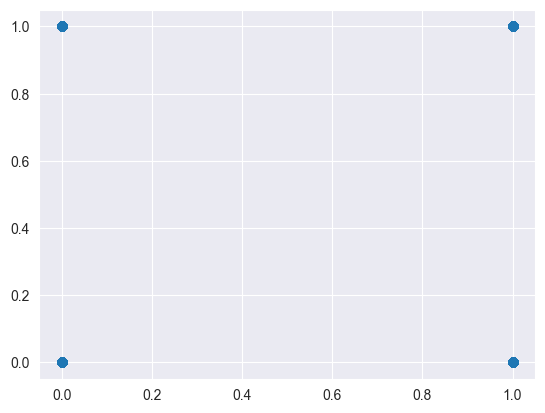

In [25]:
plt.scatter(df['price_high'], df['price_low'])
plt.show()

In [ ]:
list_columns = list(df.columns)
list_columns

In [31]:
df.drop(columns=[
    'price_close', 
    'price_high', 
    'price_low',
    'status'
])

,open,high,low,close
0,1098.45,1100.00,1098.05,1099.95
1,1100.00,1100.30,1099.45,1099.75
2,1099.70,1100.10,1099.30,1099.45
3,1099.50,1099.60,1098.50,1099.45
4,1099.40,1099.60,1098.90,1098.90
...,...,...,...,...
99995,1514.23,1514.83,1513.88,1514.73
99996,1514.78,1515.53,1514.58,1515.23
99997,1515.18,1515.88,1515.13,1515.43
99998,1515.38,1516.78,1515.38,1516.63


In [34]:
features = df[list_columns]

In [35]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

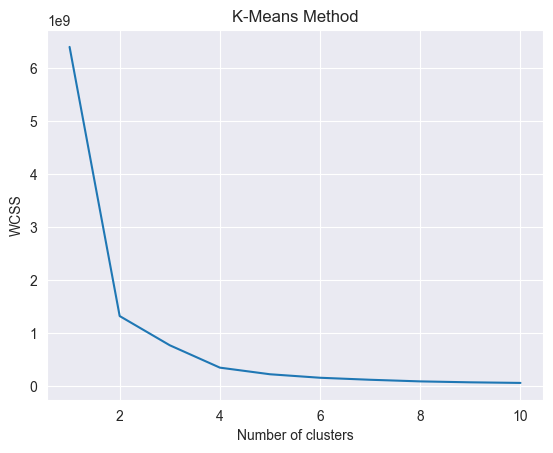

In [41]:

wcss = []

for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("K-Means Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

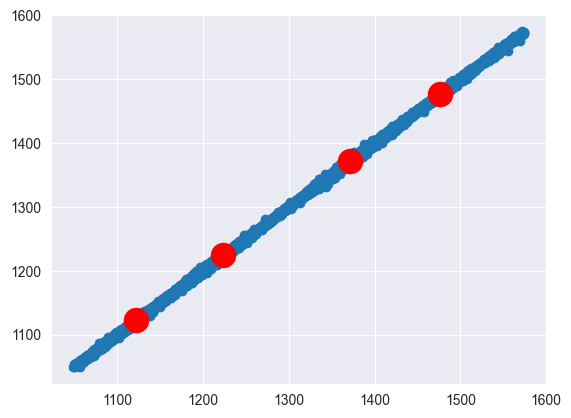

In [43]:
kmeans = KMeans(
    n_clusters=4,
    init='k-means++',
    max_iter=300,
    n_init=18,
    random_state=0
)
pred_y = kmeans.fit_predict(features)
plt.scatter(features['open'], features['close'])
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=300, c='red'
            )
plt.show()

In [ ]:
# Mengakrtifkan K mean dengan jumlah K=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(features)
print(kmeans.cluster_centers_)

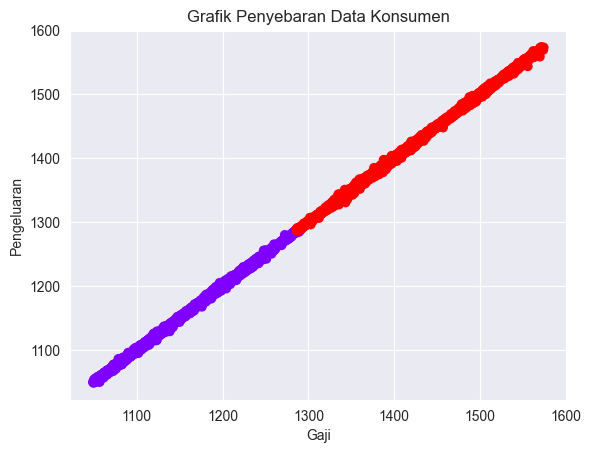

In [45]:
#plot Data point
plt.scatter(
    x=features['open'],
    y=features['close'],
    c=kmeans.labels_,
    cmap='rainbow'
)
plt.xlabel('open')
plt.ylabel('close')
plt.title('Grafik Penyebaran Data Konsumen')
plt.show()

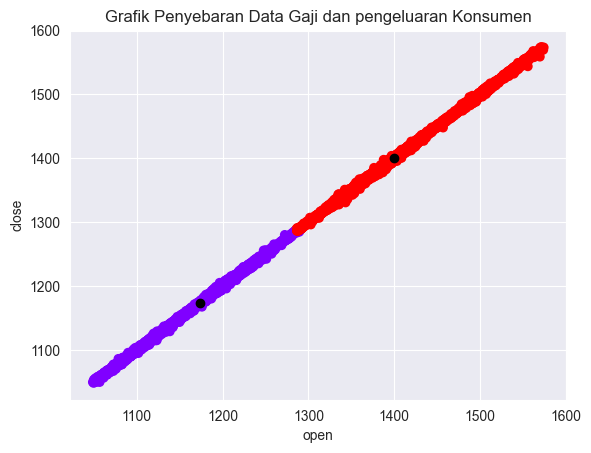

In [47]:
#plot Data point
# menvisualisasikan hasil klastering dengan centeroid dari masing masing klaster
plt.scatter(
    x=features['open'],
    y=features['close'],
    c=kmeans.labels_,
    cmap='rainbow'
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    color='black'
)
plt.xlabel('open')
plt.ylabel('close')
plt.title('Grafik Penyebaran Data Gaji dan pengeluaran Konsumen')
plt.show()

In [0]:

# Define features and target
# X = df[listColumn]
y = df['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:

# Initialize and train the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [106]:

# Make predictions
y_pred = knn.predict(X_test)

In [107]:

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Classification Report:")
print(report)
print(f"confusion : ")
print(confusion)
print(f"Accuracy: {accuracy}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.67      0.78        86
         1.0       0.50      0.20      0.29        35
         2.0       0.98      0.99      0.98      1786
         4.0       1.00      1.00      1.00      8210
         5.0       1.00      0.99      0.99      2007
         7.0       1.00      1.00      1.00      7876

    accuracy                           1.00     20000
   macro avg       0.90      0.81      0.84     20000
weighted avg       0.99      1.00      0.99     20000

confusion : 
[[  58    7   21    0    0    0]
 [   5    7   23    0    0    0]
 [   0    0 1769   17    0    0]
 [   0    0    0 8210    0    0]
 [   0    0    0   13 1984   10]
 [   0    0    0    0    1 7875]]
Accuracy: 0.99515


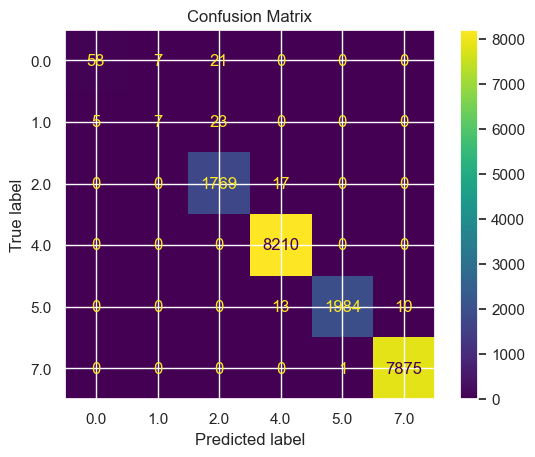

In [108]:

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

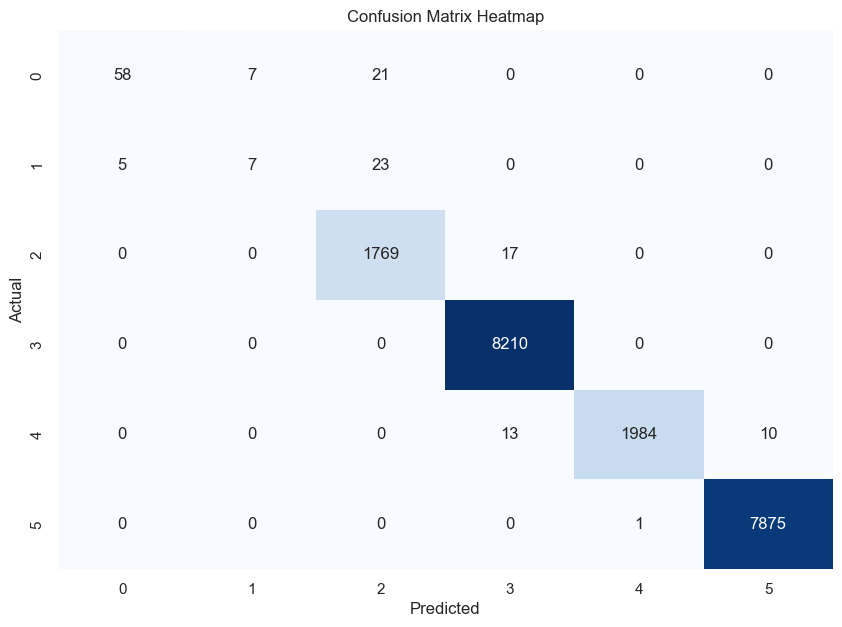

In [109]:
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


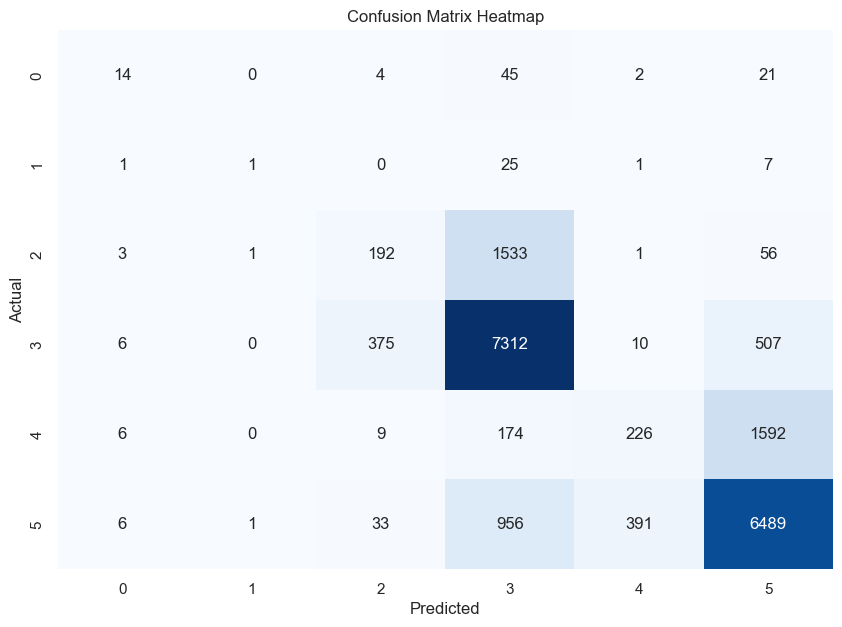

IndexError: index 6 is out of bounds for axis 1 with size 6

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# ROC Curve
y_prob = knn.predict_proba(X_test)[:1, 6]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [16]:

listColumn = list(df.columns)
listColumn.remove('time')
listColumn.remove('price_high')
listColumn.remove('price_low')
listColumn.remove('price_close')
listColumn

['open', 'high', 'low', 'close', 'status', 'Cluster']

In [17]:


# Select relevant features for classification
features = listColumn
X = df[features]
y = df['status']

In [18]:

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:

# Apply K-Means clustering with the optimal number of clusters
optimal_clusters = 4  # Based on the elbow method graph
kmeans = KMeans(
    n_clusters=optimal_clusters,
    random_state=42
)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df['Cluster']

0        2
1        0
2        0
3        0
4        0
        ..
99995    3
99996    3
99997    3
99998    3
99999    3
Name: Cluster, Length: 100000, dtype: int32

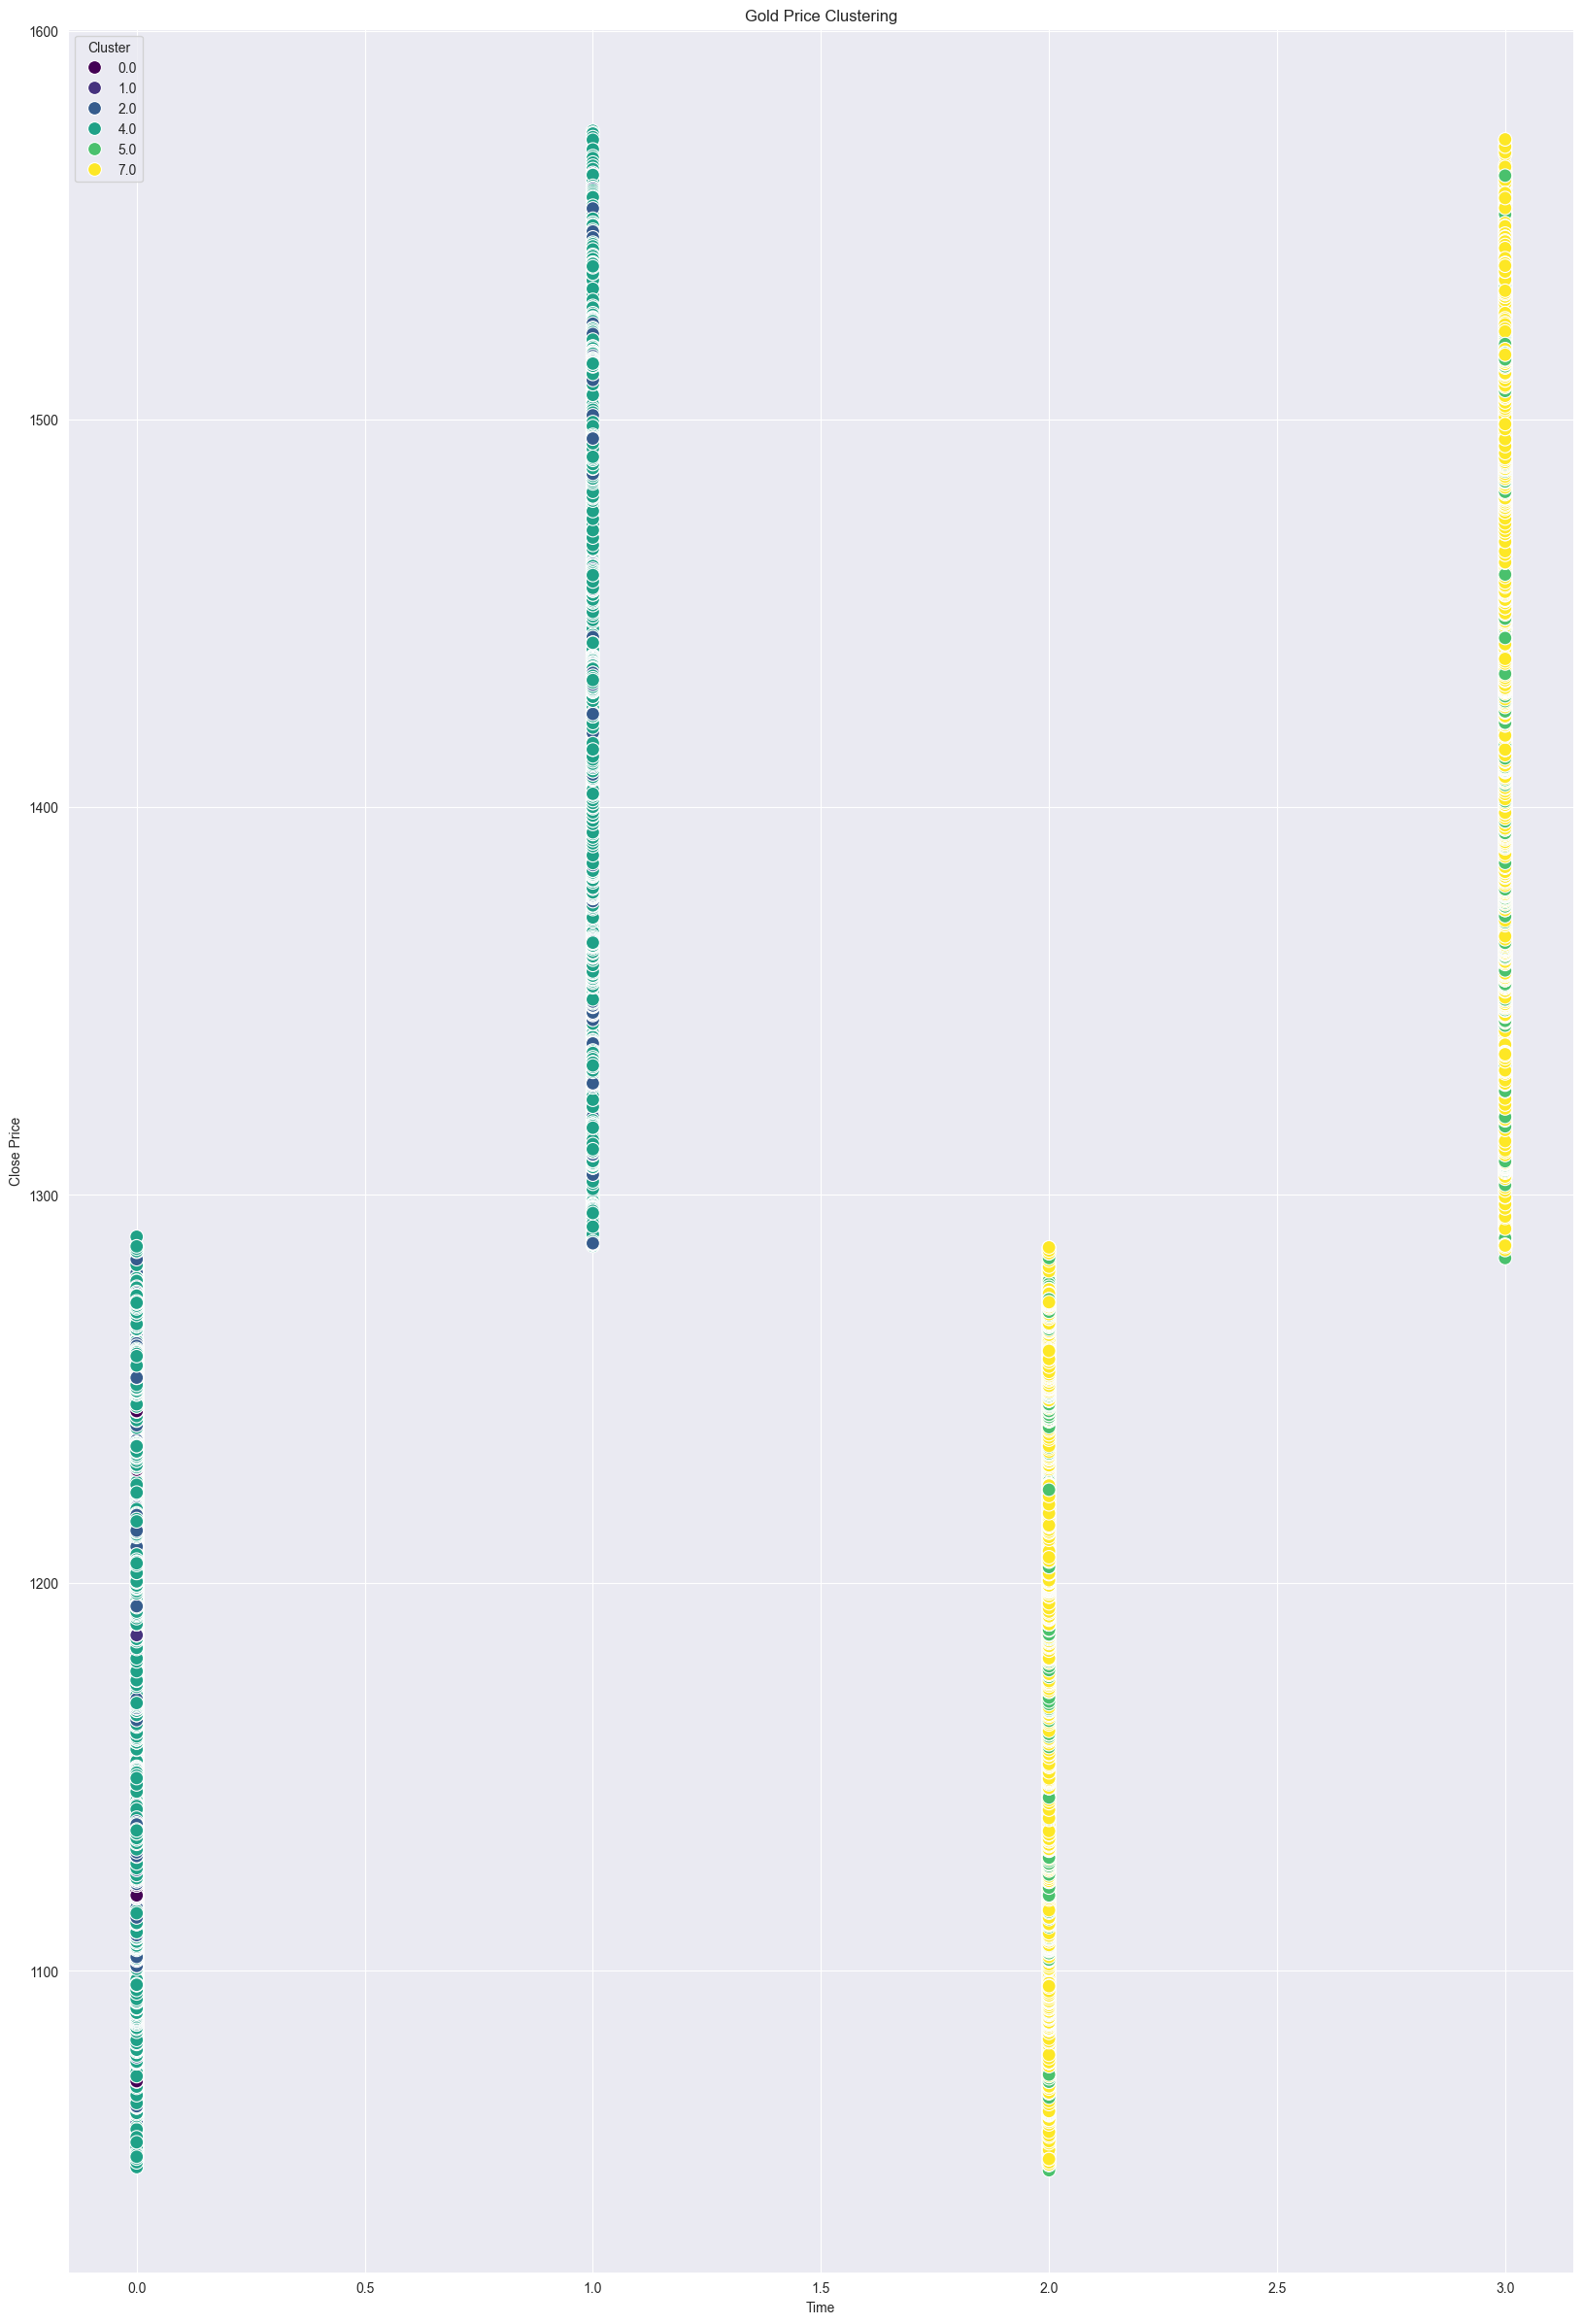

In [21]:
 # Visualize the clusters
plt.figure(figsize=(20, 30))
sns.scatterplot(
    data=df,
    x='Cluster',
    y='open',
    hue='status',
    palette='viridis',
    s=100)
plt.title('Gold Price Clustering')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend(title='Cluster')
plt.show()

C:\Users\liar88828\AppData\Local\Temp\ipykernel_5140\3246897429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\liar88828\AppData\Local\Temp\ipykernel_5140\3246897429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\liar88828\AppData\Local\Temp\ipykernel_5140\3246897429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\liar88828\AppData\Local\Temp\ipykernel_5140\3246897429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variab

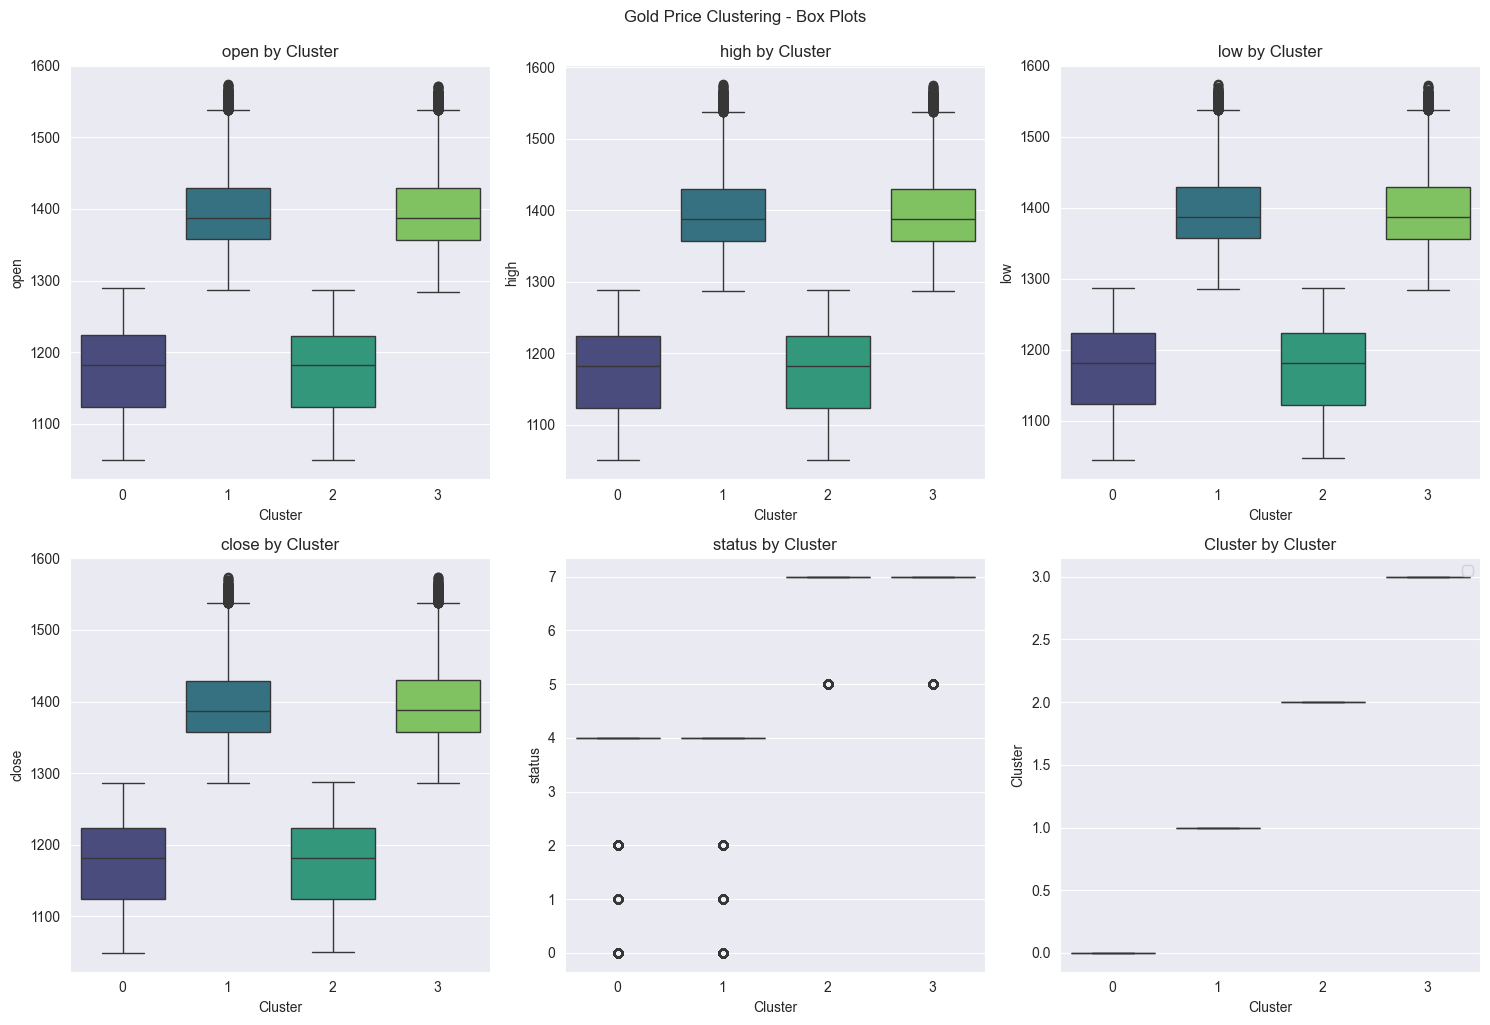

In [22]:
# Visualize clusters using box plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(
        data=df,
        x='Cluster',
        y=feature,
        palette='viridis')
    plt.title(f'{feature} by Cluster')
plt.tight_layout()
plt.suptitle(
    'Gold Price Clustering - Box Plots',
    y=1.02)

plt.legend()

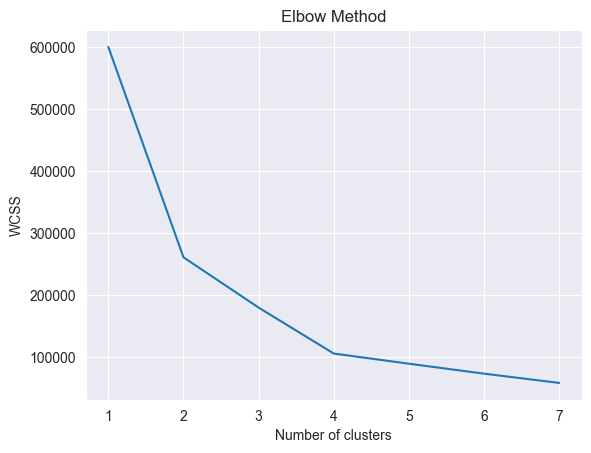

In [28]:
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 8), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()